In [23]:
import pandas as pd
import plotly.express as px
from scipy import stats

In [3]:
df = pd.read_csv('../data/Fluoridation by postcode - Sheet1.csv')

In [4]:
df.dtypes

cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object

In [5]:
df['fluoride_level'].unique() 

array(['Fluoridated', 'Not fluoridated', 'Partly fluoridated',
       'Natural fluoride'], dtype=object)

In [6]:
df['melbourne'].unique()

array([False,  True])

In [7]:
df[df.melbourne == True]

,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
1,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
7,7,True,3042,7,Fluoridated,City West Water,AIRPORT WEST,-37.724000,144.879000
8,8,True,3021,8,Fluoridated,City West Water,ALBANVALE,-37.746000,144.765000
9,9,True,3206,9,Fluoridated,South East Water,ALBERT PARK,-37.842000,144.950000
...,...,...,...,...,...,...,...,...,...
1048,1049,True,3013,1049,Fluoridated,City West Water,YARRAVILLE,-37.817000,144.890000
1049,1050,True,3013,1050,Fluoridated,City West Water,YARRAVILLE WEST,-37.815066,144.885260
1053,1054,True,3139,1054,Partly fluoridated,Yarra Valley Water,YELLINGBO,-37.810000,145.510000
1055,1056,True,3770,1056,Fluoridated,Yarra Valley Water,YERING,-37.700221,145.358251


In [8]:
fig = px.bar(
    df.groupby(['fluoride_level', 'melbourne']).size().reset_index(name='count'),
    x='fluoride_level',
    y='count',
    color='melbourne',
)


fig.show()

In [19]:
contigency_table = pd.crosstab(df['fluoride_level'], df['melbourne'])
contigency_table

melbourne,False,True
fluoride_level,,
Fluoridated,406,381
Natural fluoride,2,0
Not fluoridated,244,12
Partly fluoridated,4,10


In [29]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print(f'chi2: {chi2}, p: {p}, dof: {dof}, \n\n',f'expected: \n{expected}')

chi2: 164.56534953232273, p: 1.895889619062605e-35, dof: 3, 

 expected: 
[[487.50897073 299.49102927]
 [  1.23890463   0.76109537]
 [158.57979226  97.42020774]
 [  8.67233239   5.32766761]]


In [30]:
if p < 0.05:
    association_result = "There is a significant association between 'melbourne' and 'fluoride_level'."
else:
    association_result = "There is no significant association between 'melbourne' and 'fluoride_level'."

association_result

"There is a significant association between 'melbourne' and 'fluoride_level'."

In [9]:
n_comps_by_suburb = (df.groupby(['townsuburb'])
                      .agg({'water_company': 'count'})
                      .rename(columns={'water_company': 'n_companies'})
                      .sort_values(by='n_companies', ascending=False)
                      .reset_index())

print(n_comps_by_suburb
      .to_markdown())

|      | townsuburb           |   n_companies |
|-----:|:---------------------|--------------:|
|    0 | BELGRAVE             |             2 |
|    1 | MULGRAVE             |             2 |
|    2 | HUNTINGDALE          |             2 |
|    3 | MELBOURNE            |             2 |
|    4 | COBURG               |             2 |
|    5 | ARMADALE             |             2 |
|    6 | OAKLEIGH             |             2 |
|    7 | HUGHESDALE           |             2 |
|    8 | TULLAMARINE          |             2 |
|    9 | UPWEY                |             2 |
|   10 | MALVERN              |             2 |
|   11 | PAKENHAM             |             2 |
|   12 | BAYSWATER            |             2 |
|   13 | NORTH SHORE          |             1 |
|   14 | NORTH WARRANDYTE     |             1 |
|   15 | NUMURKAH             |             1 |
|   16 | NORTHCOTE            |             1 |
|   17 | NOTTING HILL         |             1 |
|   18 | NOWA NOWA            |         

In [10]:
max_n_comps = n_comps_by_suburb['n_companies'].max()
biggest_n_comp_sub = n_comps_by_suburb.query('n_companies == @max_n_comps')
biggest_n_comp_sub

,townsuburb,n_companies
0,BELGRAVE,2
1,MULGRAVE,2
2,HUNTINGDALE,2
3,MELBOURNE,2
4,COBURG,2
5,ARMADALE,2
6,OAKLEIGH,2
7,HUGHESDALE,2
8,TULLAMARINE,2
9,UPWEY,2


In [11]:
n_flu_comp_by_suburb = (df.groupby(['townsuburb', 'fluoride_level'])
                        .agg({'water_company': 'count'})
                        .rename(columns={'water_company': 'n_companies'})
                        .sort_values(by='n_companies', ascending=False))

In [31]:
max_n_flu_comp = n_flu_comp_by_suburb['n_companies'].max()
n_flu_comp_by_suburb.query('''fluoride_level != "Not fluoridated" and \
                           n_companies == @max_n_flu_comp''')

,,n_companies
townsuburb,fluoride_level,
BELGRAVE,Fluoridated,2
MULGRAVE,Fluoridated,2
HUNTINGDALE,Fluoridated,2
MELBOURNE,Fluoridated,2
COBURG,Fluoridated,2
ARMADALE,Fluoridated,2
OAKLEIGH,Fluoridated,2
HUGHESDALE,Fluoridated,2
TULLAMARINE,Fluoridated,2


In [13]:
print(n_flu_comp_by_suburb.reset_index().to_markdown())

|      | townsuburb           | fluoride_level     |   n_companies |
|-----:|:---------------------|:-------------------|--------------:|
|    0 | BELGRAVE             | Fluoridated        |             2 |
|    1 | MULGRAVE             | Fluoridated        |             2 |
|    2 | HUNTINGDALE          | Fluoridated        |             2 |
|    3 | MELBOURNE            | Fluoridated        |             2 |
|    4 | COBURG               | Fluoridated        |             2 |
|    5 | ARMADALE             | Fluoridated        |             2 |
|    6 | OAKLEIGH             | Fluoridated        |             2 |
|    7 | HUGHESDALE           | Fluoridated        |             2 |
|    8 | TULLAMARINE          | Fluoridated        |             2 |
|    9 | UPWEY                | Fluoridated        |             2 |
|   10 | MALVERN              | Fluoridated        |             2 |
|   11 | PAKENHAM             | Fluoridated        |             2 |
|   12 | BAYSWATER            | Fl

In [34]:
top_10_subs = n_flu_comp_by_suburb.head(10).reset_index()
top_10_subs

,townsuburb,fluoride_level,n_companies
0,BELGRAVE,Fluoridated,2
1,MULGRAVE,Fluoridated,2
2,HUNTINGDALE,Fluoridated,2
3,MELBOURNE,Fluoridated,2
4,COBURG,Fluoridated,2
5,ARMADALE,Fluoridated,2
6,OAKLEIGH,Fluoridated,2
7,HUGHESDALE,Fluoridated,2
8,TULLAMARINE,Fluoridated,2
9,UPWEY,Fluoridated,2


In [40]:
fig = px.histogram(
    data_frame=top_10_subs,
    x=top_10_subs['townsuburb'].apply(lambda x: x.capitalize()),
    y='n_companies',
    template='plotly_dark',
)
fig.update_layout(
    title='Top 10 suburbs with the most water companies',
    xaxis_title='Suburb',
    yaxis_title='Number of water companies',
)
fig.show()

In [16]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    color='water_company',
    mapbox_style='carto-positron',
    zoom=8,
    center={'lat': df.query('postcode == 3000')['lat'].values[0], 
            'lon': df.query('postcode == 3000')['lon'].values[0]},
    opacity=0.8,
    hover_name='townsuburb',
    hover_data=['water_company'],
    color_discrete_map={'Fluoridated': 'red', 'Not fluoridated': 'blue', 'Partly fluoridated': 'black'},
    template='plotly_dark',
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    width=1280,
    height=720,
    )

fig.show()

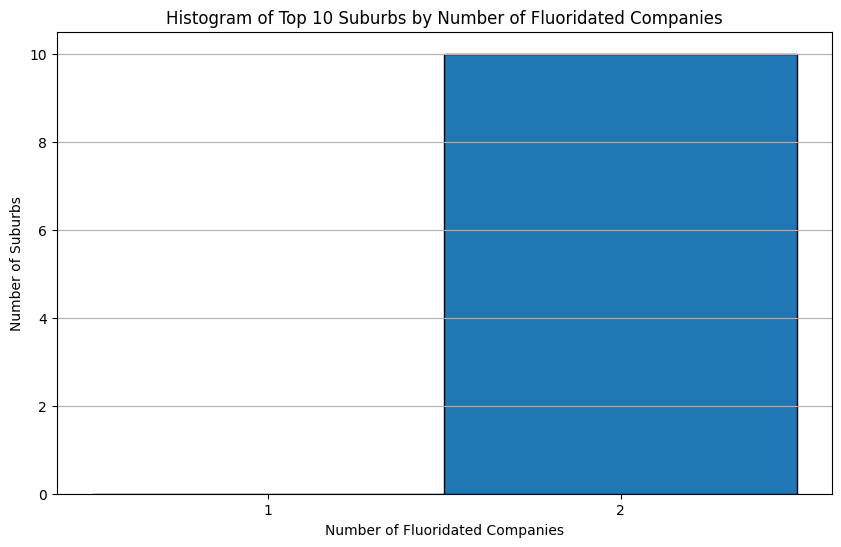

,Suburb,Num_Fluoridated_Companies
22,ARMADALE,2
57,BAYSWATER,2
63,BELGRAVE,2
165,COBURG,2
331,HUGHESDALE,2
332,HUNTINGDALE,2
422,MALVERN,2
490,MULGRAVE,2
531,OAKLEIGH,2
540,PAKENHAM,2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../data/Fluoridation by postcode - Sheet1.csv'
data = pd.read_csv(file_path)

# Filter for fluoridated companies
fluoridated_data = data[data['fluoride_level'] == 'Fluoridated']

# Count the number of fluoridated companies per suburb
suburb_counts = fluoridated_data.groupby('townsuburb')['water_company'].nunique().reset_index()
suburb_counts.columns = ['Suburb', 'Num_Fluoridated_Companies']

# Get the top 10 suburbs with the most fluoridated companies
top_10_suburbs = suburb_counts.nlargest(10, 'Num_Fluoridated_Companies')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(top_10_suburbs['Num_Fluoridated_Companies'], bins=range(1, top_10_suburbs['Num_Fluoridated_Companies'].max() + 2), edgecolor='black', align='left')
plt.xlabel('Number of Fluoridated Companies')
plt.ylabel('Number of Suburbs')
plt.title('Histogram of Top 10 Suburbs by Number of Fluoridated Companies')
plt.xticks(range(1, top_10_suburbs['Num_Fluoridated_Companies'].max() + 1))
plt.grid(axis='y')
plt.show()

# Display the top 10 suburbs data
top_10_suburbs


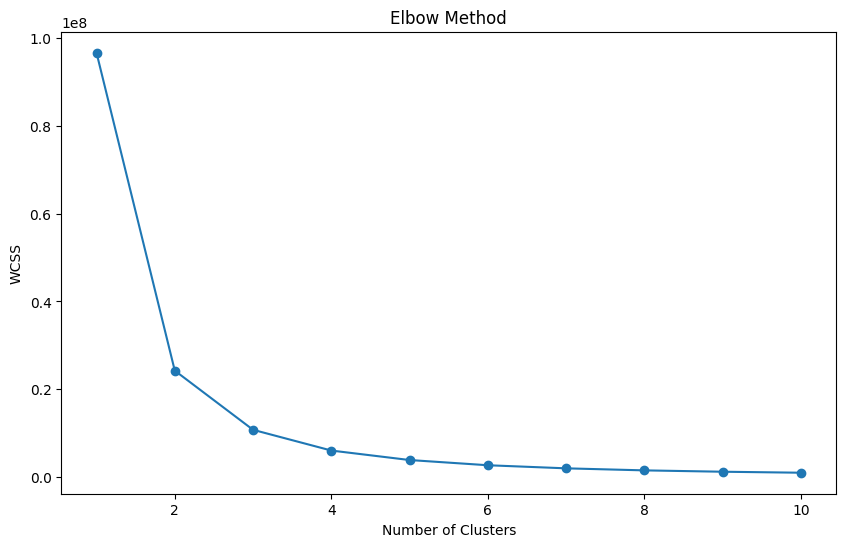

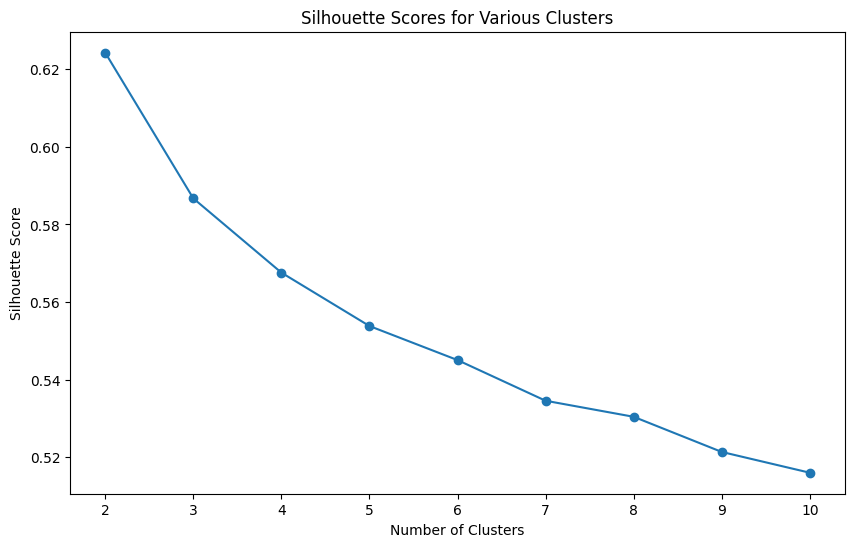

2

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

label_encoder = LabelEncoder()

df['water_company_encoded'] = label_encoder.fit_transform(df['water_company'])
df['townsuburb_encoded'] = label_encoder.fit_transform(df['townsuburb'])
df['fluoride_level_encoded'] = label_encoder.fit_transform(df['fluoride_level'])

# Select features for clustering
features = df[['water_company_encoded', 'townsuburb_encoded', 'fluoride_level_encoded', 'lat', 'lon']]

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method result
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Using silhouette score to determine the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(features)
    score = silhouette_score(features, preds)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2
optimal_clusters

In [44]:
# Number of unique suburbs
num_suburbs = df['townsuburb'].nunique()
print(f"Number of unique suburbs: {num_suburbs}")


Number of unique suburbs: 1046


In [48]:
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the original data
df['cluster'] = clusters

# Calculate purity score
def purity_score(y_true, y_pred):
    # Compute contingency matrix (also called confusion matrix)
    contingency = contingency_matrix(y_true, y_pred)
    # Find the dominant cluster in each cluster and sum their counts
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Assuming 'fluoride_level' as the ground truth for purity score
purity = purity_score(df['fluoride_level_encoded'], df['cluster'])
print(f"Purity score: {purity}")

Purity score: 0.7431539187913125
